<a href="https://colab.research.google.com/github/Aboubacar2012/ML_Project/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [7]:

columns_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df=pd.read_csv('/content/drive/MyDrive/ml_data/supervised_learning/regression /Boston Housing /housing.csv', delimiter=r"\s+", header=None, names=columns_names)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


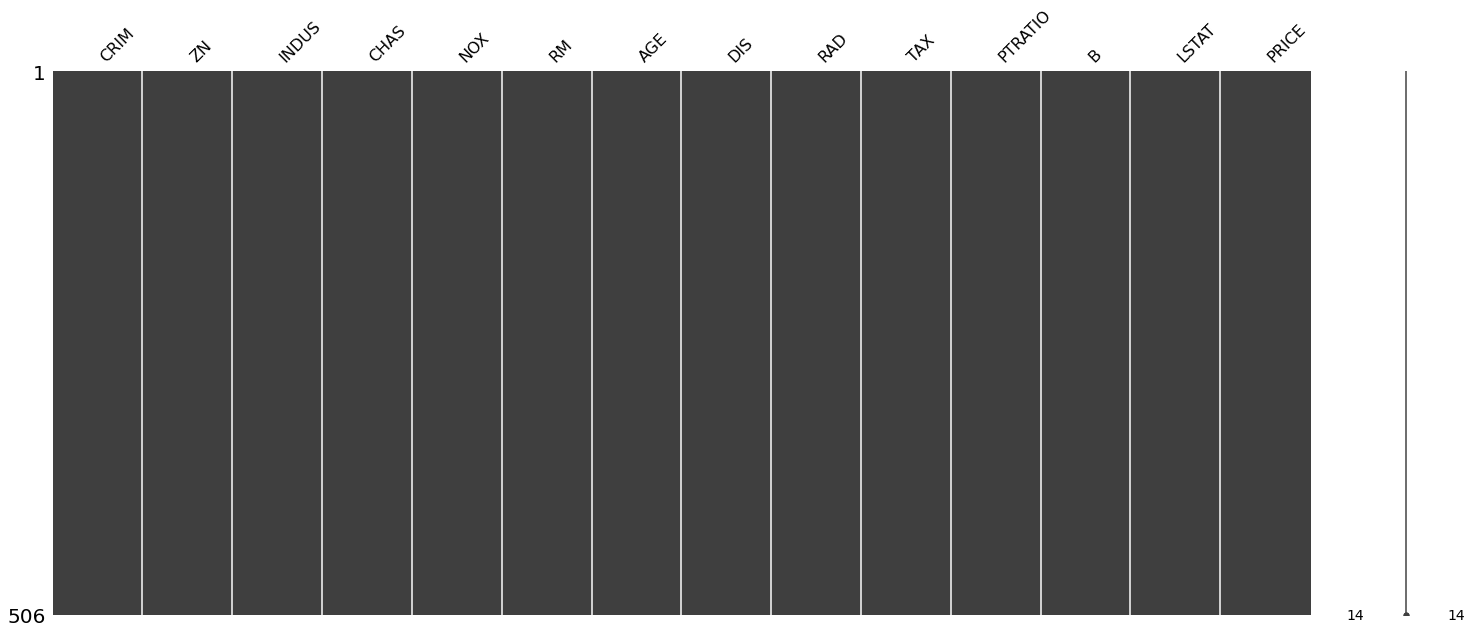

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
total_null_values=df.isnull().sum().sort_values(ascending=False)
total_null_values

PRICE      0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64

Ditribution of data

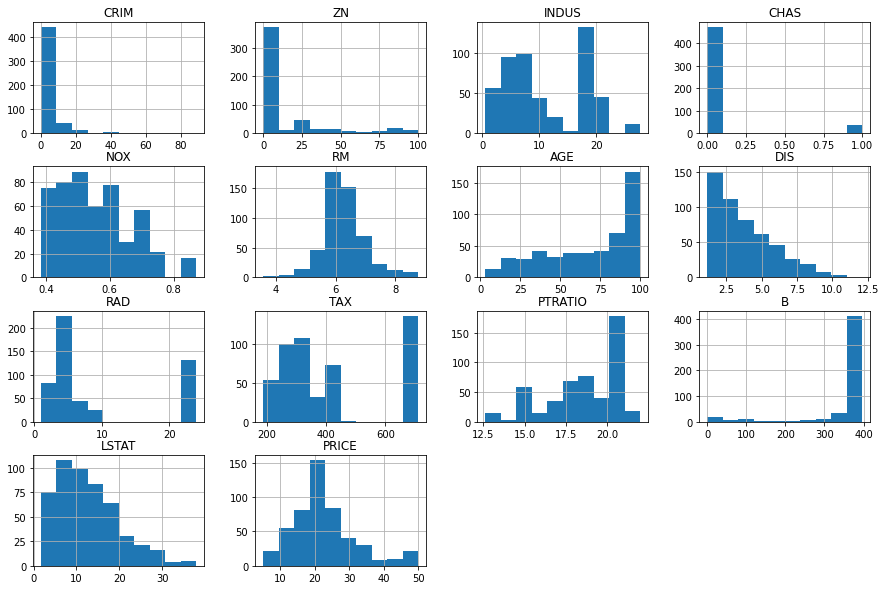

In [14]:
df.hist(figsize=(15, 10))
plt.show()

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [16]:
df['PRICE']=df.PRICE

In [17]:
price_correlation=df.corr()

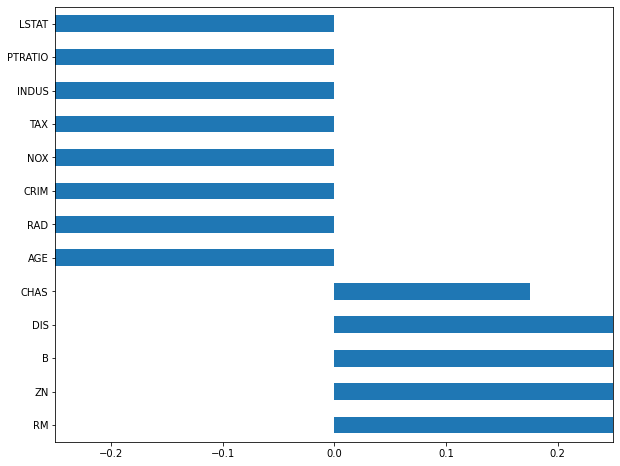

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
(price_correlation
  .PRICE
  .drop('PRICE')
  .sort_values(ascending=False)
  .plot
  .barh(xlim=((-.25, .25))))

Skewness coeff. is : %f 1.1080984082549072
Kurtosis coeff. is : %f 1.495196944165818


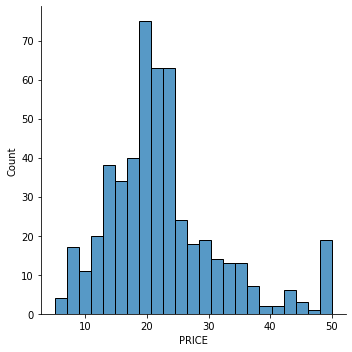

In [20]:
sns.displot(df['PRICE'])
print("Skewness coeff. is : %f", df['PRICE'].skew())
print('Kurtosis coeff. is : %f', df['PRICE'].kurt())

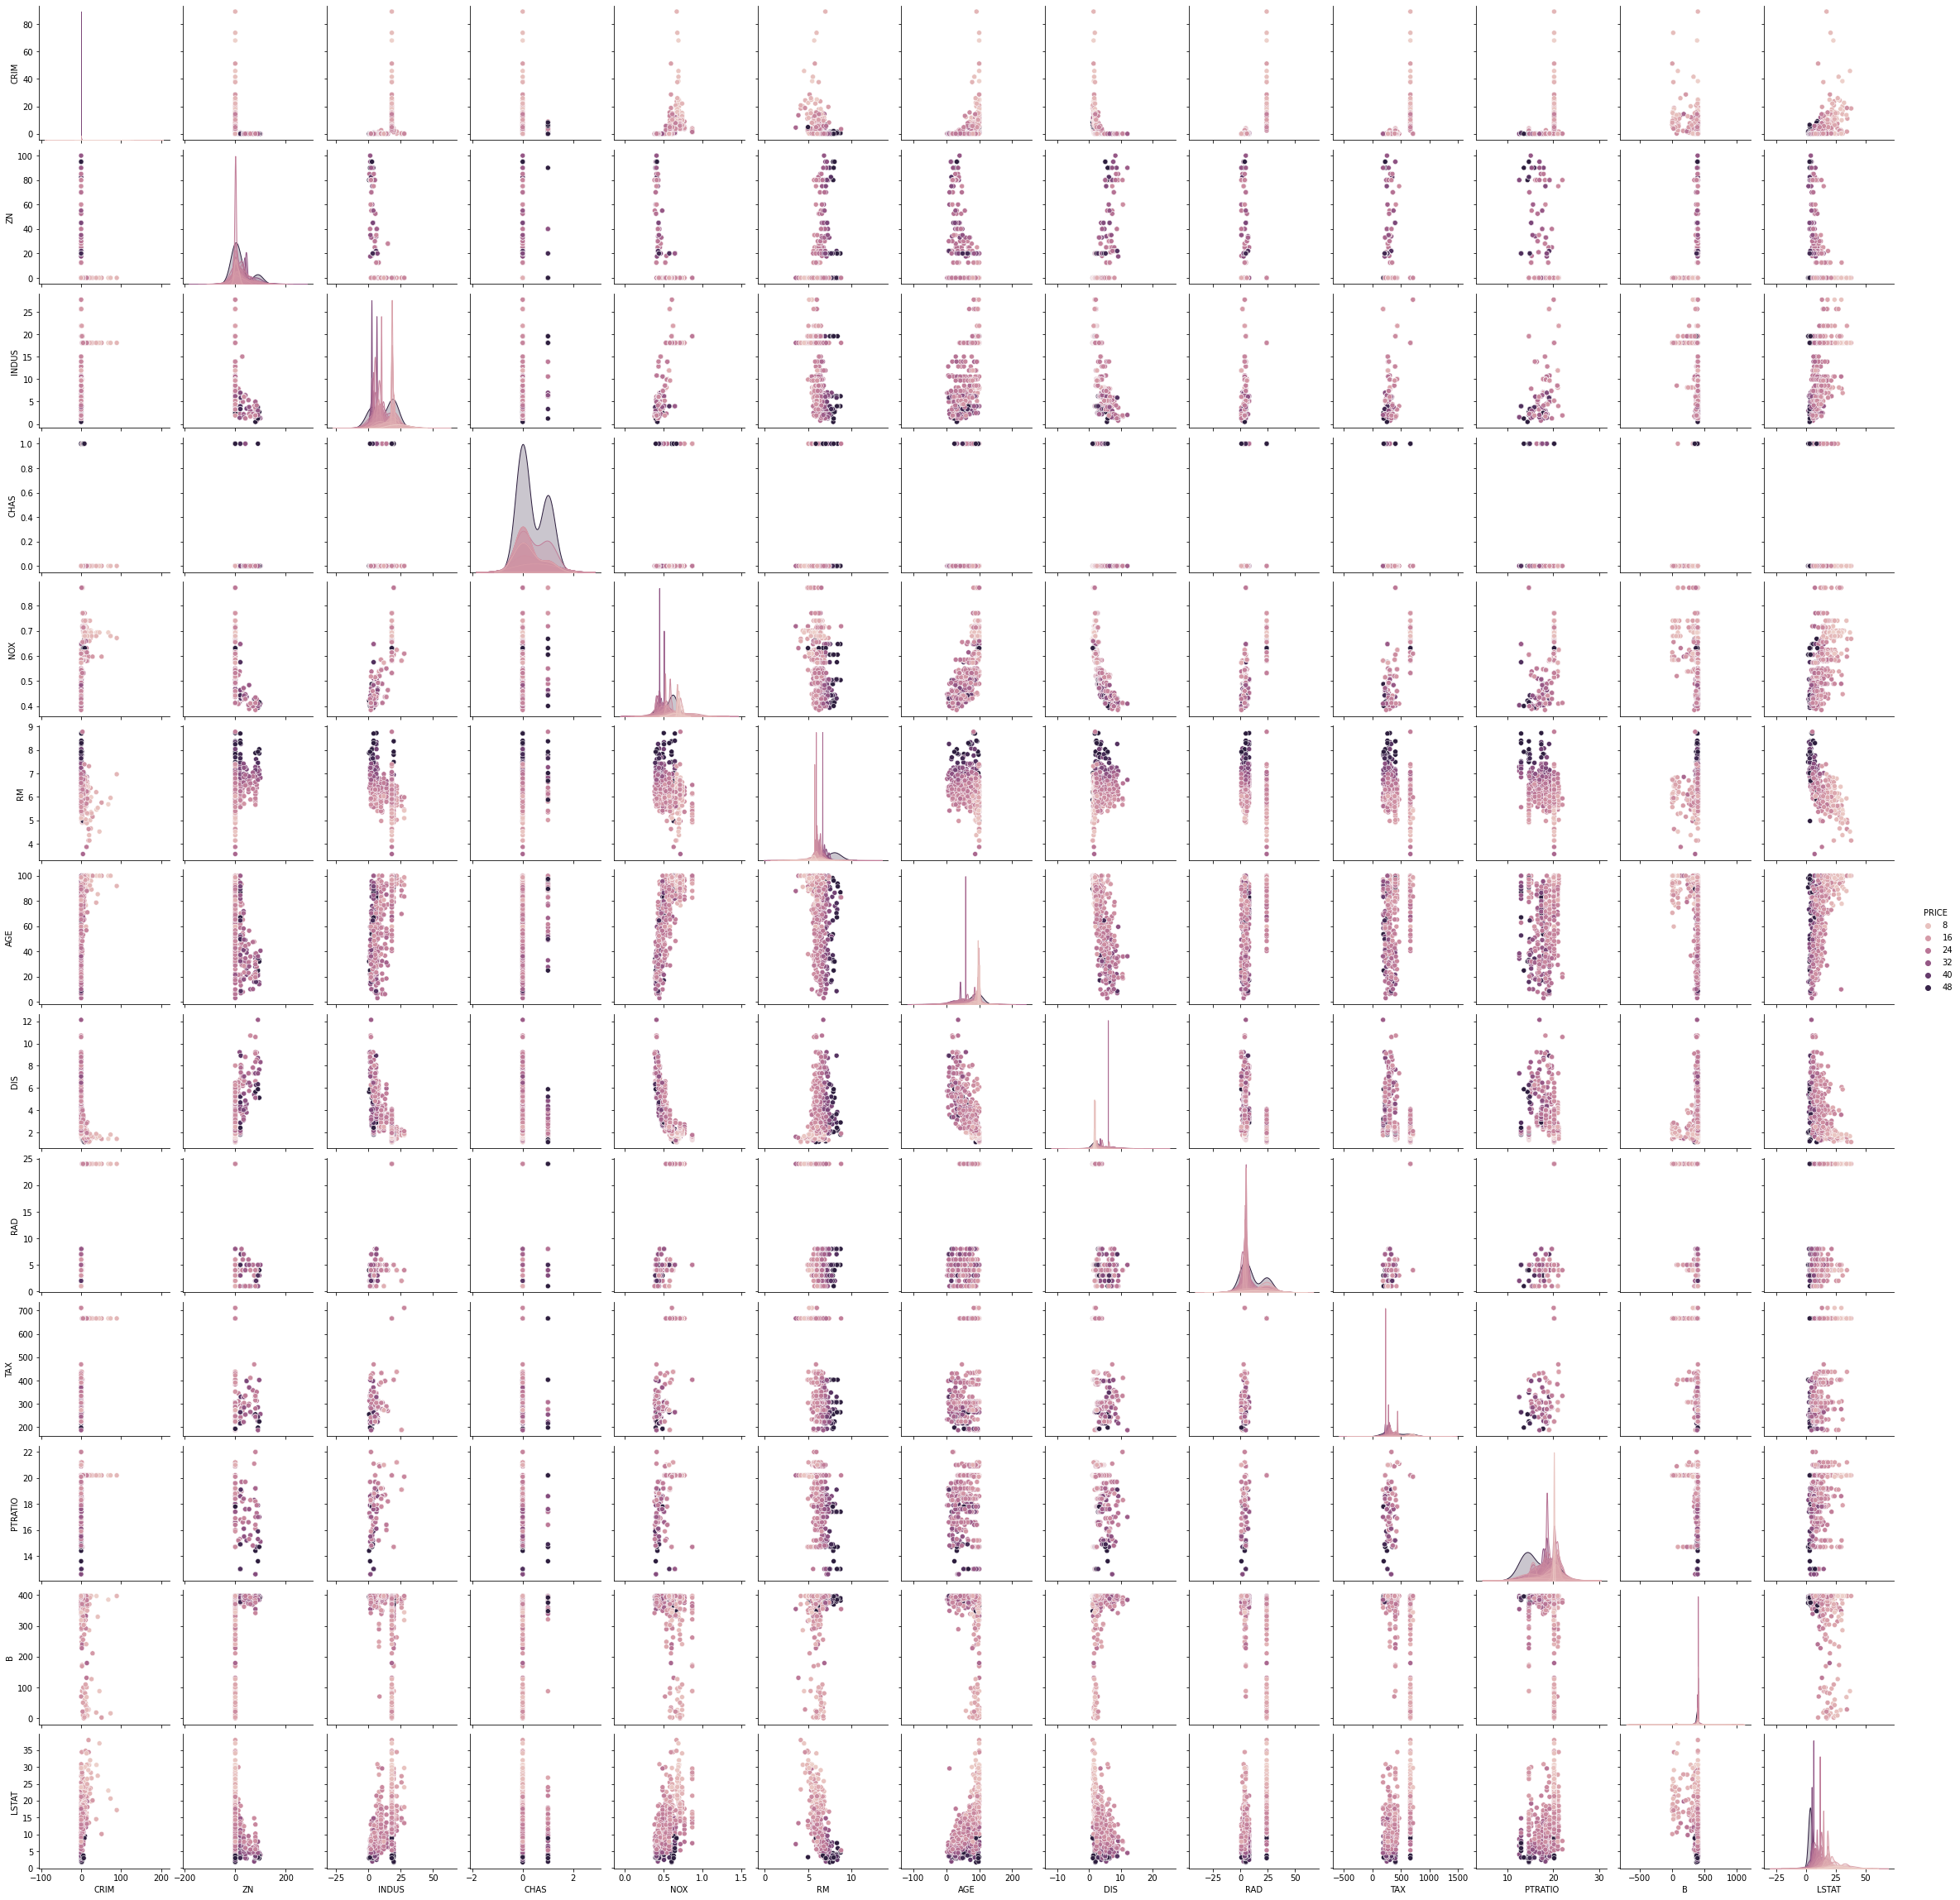

In [24]:
import warnings as wgn
wgn.filterwarnings('ignore')
sns.pairplot(df, hue='PRICE')
plt.show()

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
X=df[['CRIM','ZN','INDUS','CHAS','NOX','RM',	'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

In [28]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [29]:
y=df['PRICE']

In [30]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [31]:
#Feature scaling 
from sklearn.preprocessing import MinMaxScaler
scalerX=MinMaxScaler()
scalerX.fit(X)
X=scalerX.transform(X)

In [33]:
X[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [34]:
#Splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=41)

In [35]:
print('X_train:',X_train)
print('X_test:',X_test)

X_train: [[0.00114207 0.         0.29692082 ... 0.88297872 0.99140148 0.31098234]
 [0.01502216 0.         0.70087977 ... 0.22340426 0.89154773 0.12969095]
 [0.05401615 0.         0.64662757 ... 0.80851064 0.64277069 0.4053532 ]
 ...
 [0.06592939 0.         0.64662757 ... 0.80851064 1.         0.48675497]
 [0.13269637 0.         0.64662757 ... 0.80851064 0.12136265 0.57974614]
 [0.10478569 0.         0.64662757 ... 0.80851064 1.         0.45253863]]
X_test: [[1.36817089e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  9.15603409e-01 7.89183223e-02]
 [5.83956053e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.96293308e-01 2.69039735e-01]
 [1.94076917e-03 0.00000000e+00 3.38343109e-01 ... 7.02127660e-01
  9.90897171e-01 4.37913907e-01]
 ...
 [1.04895837e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.52302184e-01 6.16721854e-01]
 [3.45397791e-04 2.00000000e-01 1.05205279e-01 ... 2.44680851e-01
  9.88224318e-01 7.89183223e-02]
 [4.59827528e-02 0.00000000e+00 7.00879

Model

In [36]:
#Linear regression 
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_predic_ling_reg=lin_reg.predict(X_test)
#Check the score  of the model 
print(lin_reg.score(X_test, y_test))

0.5058136899387871


In [39]:
# Check the RMSE
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
print("mean squares error", rmse)

mean squares error 4.790148888368433


In [46]:
# Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rdf_reg=RandomForestRegressor(n_estimators=100
                              , random_state=40, min_impurity_decrease=0.002, min_weight_fraction_leaf=0.001, min_samples_leaf=5)
rdf_reg.fit(X_train, y_train)
rdf_predict=rdf_reg.predict(X_test)
#Check the score 
print(rdf_reg.score(X_test, y_test))

0.635269443036603


In [47]:
#Check RMSE
rmse2=math.sqrt(mean_squared_error(y_test, rdf_reg.predict(X_test)))
print("Mean squares error :", rmse2)

Mean squares error : 4.115188489574985


In [52]:
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
dtree_reg=DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
#Check the score
print(dtree_reg.score(X_test, y_test))

0.4442154770477957


In [62]:
rmse3 = math.sqrt(mean_squared_error(y_test, dtree_reg.predict(X_test)))

print("mean squares error :",rmse3)

mean squares error : 5.0799201012707


In [72]:
# Xboost 
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#RMSE estimated through the partition of the train set
GBoost.fit(X_train, y_train)
#Check the score 
print(GBoost.score(X_test, y_test))

0.7799446908538114


In [73]:
rmse4 = math.sqrt(mean_squared_error(y_test, GBoost.predict(X_test)))

print("mear squares error :",rmse4)

mear squares error : 3.1964622715650983
